Saving z_uk-_ystrely.mp3 to z_uk-_ystrely (1).mp3
Machine gun: 0.9732674956321716
Gunshot, gunfire: 0.971496045589447
Explosion: 0.9337680339813232
Duck: 0.15134993195533752
Livestock, farm animals, working animals: 0.0952199324965477


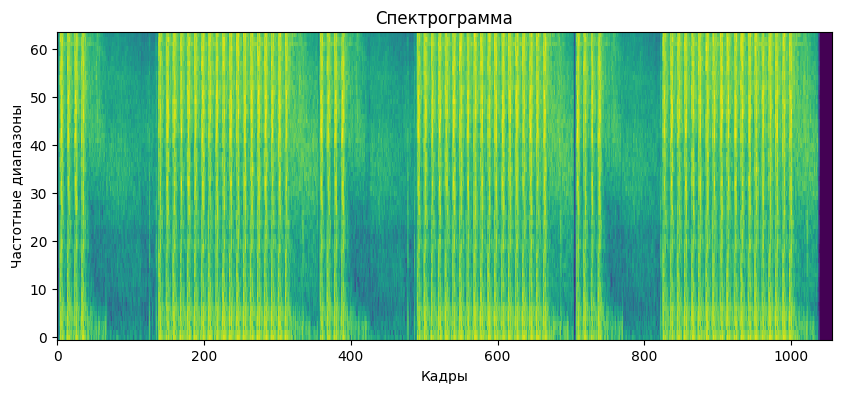

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import librosa
import csv


def load_yamnet_model(model_url):
    return hub.load(model_url)


def load_audio(file_path, sample_rate=16000):
    waveform, _ = librosa.load(file_path, sr=sample_rate, mono=True)
    return waveform.astype(np.float32)


def load_class_names(class_map_path):
    class_names = []
    with tf.io.gfile.GFile(class_map_path) as file:
        reader = csv.reader(file)
        next(reader)
        class_names = [row[2] for row in reader]
    return class_names


def analyze_audio(yamnet_model, waveform, class_names, top_n=5):
    scores, _, spectrogram = yamnet_model(waveform)
    top_class_indices = np.argsort(scores[0])[::-1][:top_n]

    for i in top_class_indices:
        print(f'{class_names[i]}: {scores[0][i]}')

    return spectrogram


def plot_spectrogram(spectrogram):
    plt.figure(figsize=(10, 4))
    plt.imshow(spectrogram.numpy().T, aspect='auto', interpolation='nearest', origin='lower')
    plt.title('Спектрограмма')
    plt.xlabel('Кадры')
    plt.ylabel('Частотные диапазоны')
    plt.show()


def main():
    yamnet_model_url = 'https://tfhub.dev/google/yamnet/1'
    yamnet_model = load_yamnet_model(yamnet_model_url)

    from google.colab import files
    uploaded = files.upload()
    audio_file = list(uploaded.keys())[0]

    waveform = load_audio(audio_file)

    class_map_path = yamnet_model.class_map_path().numpy().decode('utf-8')
    class_names = load_class_names(class_map_path)

    spectrogram = analyze_audio(yamnet_model, waveform, class_names)

    plot_spectrogram(spectrogram)


if __name__ == "__main__":
    main()
